In [7]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
data=pd.read_csv('C:/Users/ACER/OneDrive - itfac.mrt.ac.lk/Desktop/code_alpha/GOOG.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


Text(0.5, 1.0, 'The price closing values')

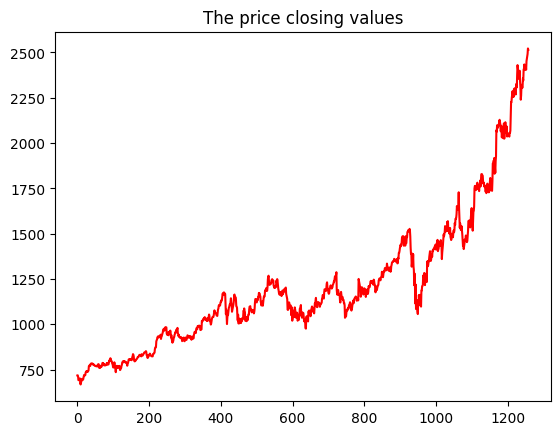

In [9]:
close=data.iloc[:,2:3].values
plt.plot(close,color='red')
plt.title("The price closing values")

In [10]:
# We take the 70 training data 
# and 30% per testing data 
data_training=pd.DataFrame(data['close'][0:int(len(data)*0.7)])
data_testing=pd.DataFrame(data['close'][int(len(data)*0.70): int(len(data))])

In [11]:
#fit the close data into the MinMaxscaler
min_max=MinMaxScaler(feature_range=(0, 1))
train=min_max.fit_transform(data_training)

In [12]:
#divded the data into train and testing
x_train=[]
y_train=[]
for i in range(100,train.shape[0]):
    x_train.append(train[i-100:i])
    y_train.append(train[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [1]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/76/4f/39ddae9fb07b8c039fa5a5f2b6623c6e0564199d82da33fcef62bcf93174/tensorflow-2.16.1-cp312-cp312-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached tensorflow-2.16.1-cp312-cp312-win_amd64.whl (2.1 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "c:\Python312\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Python312\Lib\site-packages\setuptools\_

In [3]:
#RNN model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [13]:
#Modelbuliding
#Let's create model
regressor=Sequential()
#frist layer
regressor.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
#Second layer
regressor.add(LSTM(units=100,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))
#Thried layer
regressor.add(LSTM(units=120,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))
#Forth layer
regressor.add(LSTM(units=150,activation='relu'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#Compile the model
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 0.1886
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0207
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - loss: 0.0096
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0070
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0084
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0077
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0064
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0059
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0069
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0067
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0075
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0079
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0063
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0064
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - lo

In [18]:

# Assuming data_training and data_testing are already defined
# Ensure data_training is a DataFrame
data_training = pd.DataFrame(data_training)

# Select the last 100 rows from data_training
past_100 = data_training.tail(100)

# Append data_testing to past_100
final_df = pd.concat([past_100, data_testing], ignore_index=True)

# Display the first few rows of the final dataframe
print(final_df.head())


     close
0  1138.07
1  1146.21
2  1137.81
3  1132.12
4  1250.41


In [19]:
test_data=min_max.fit_transform(final_df)
test_data.shape

(478, 1)

In [20]:
x_test=[]
y_test=[]
for i in range(100,test_data.shape[0]):
    x_test.append(test_data[i-100:i])
    y_test.append(test_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
#Prediction of the test data set
y_pred=regressor.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step


In [21]:
y_prediction=min_max.inverse_transform(y_pred)

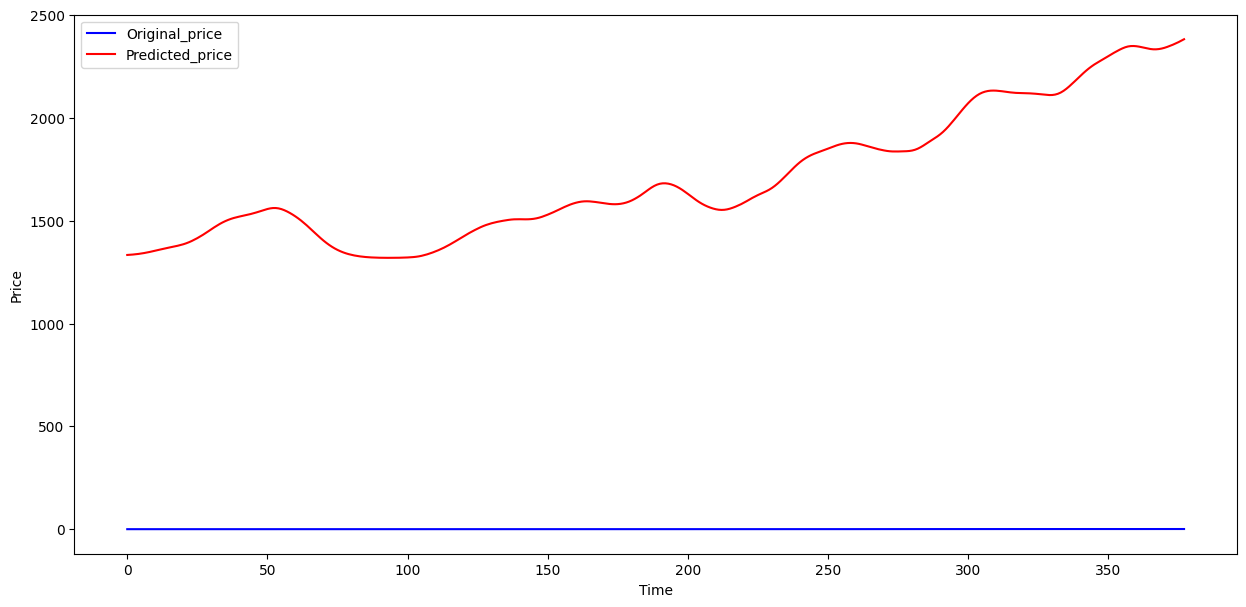

In [22]:
plt.figure(figsize=(15,7))
plt.plot(y_test,'blue',label="Original_price")
plt.plot(y_prediction,'red',label="Predicted_price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()